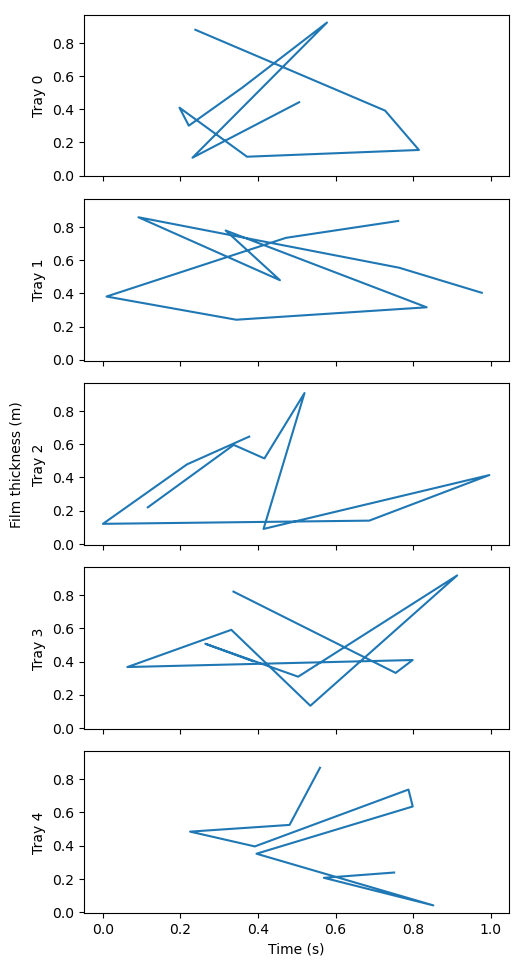

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(5, 1, figsize=(6, 10), sharex=True, sharey=True)
for i, ax in enumerate(axs):
    ax.plot(np.random.rand(10), np.random.rand(10))
    ax.set_ylabel(f"Tray {i}")

axs[-1].set_xlabel("Time (s)")

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
plt.ylabel("Film thickness (m)", labelpad=20)

fig.tight_layout()
